In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from scipy.misc import logsumexp

# Please implement the fit and predict methods of this class. You can add additional private methods
# by beginning them with two underscores. It may look like the __dummyPrivateMethod below.
# You can feel free to change any of the class attributes, as long as you do not change any of 
# the given function headers (they must take and return the same arguments), and as long as you
# don't change anything in the .visualize() method. 
class LogisticRegression2:
    
    def __init__(self, X, b,y, eta, lambda_parameter):
        self.eta = eta
        self.lambda_parameter = lambda_parameter
        self.z_s = None
        self.proba = None
        
        self.weights = np.zeros([x.shape[1]+1,len(np.unique(y))])
        
        # add ones
        #self.X = X
        self.X = np.append(np.ones(X.shape[0]).reshape(-1,1),X,axis=1)
        
        self.b = np.zeros([self.weights.shape[0]]) #bias term slash offset
        
        self.y = pd.get_dummies(y)
        
        self.C = y.values
        #print(self.y)
        
    #Private method (need to add two underscores in the front)
    def __get_Z(self):

        self.z_s = np.dot(self.weights,self.X.T) + self.b.reshape(-1,1)
        
    # Softmax function for Logistic Regression

    def __Softmax(self,get_class=False):
        
        self.__get_Z()
        
        #If asked for probabilities for each class, calculate here
        self.proba = np.array([np.exp(z)/(np.sum(np.exp(self.z_s),axis=0)) for z in self.z_s]).T
        return self.proba
    
    def __cross_entropy(self):
        cross_entropy = - np.mean(np.sum(self.y * np.log(self.proba) +(1 - self.y) * np.log(1 - self.proba),axis=1))

        return cross_entropy
    
    def __train(self):
        self.__Softmax()
        
        # compute gradient
        grad_y = self.y - self.proba

        loss_update = self.eta*np.dot(self.X.T,grad_y).T
        
        L2_reg = self.eta*self.lambda_parameter*np.square(self.weights)
        
        #update weigths
        self.weights += loss_update - L2_reg

        # update bias
        self.b = self.eta* np.mean(grad_y,axis=0)

    def fit(self,max_iter=200000):
        
        previous_cost = 100000000
        
        #Workhorse optimization for loop
        self.iter_cost_dict = {}
        
        for it in range(max_iter):
            self.__train()
            cost = self.__cross_entropy()
            self.iter_cost_dict[it] = cost
            if previous_cost-cost < 0.000001:
                break
            if it % 5000 == 0:
                print("Entropy before iter {} is {}".format(it,self.__cross_entropy()))
            previous_cost = cost
            
        #return iter_cost_dict

    # TODO: Implement this method!
    def predict(self, X_to_predict,get_class=False):
        # The code in this method should be removed and replaced! We included it just so that the distribution code
        # is runnable and produces a (currently meaningless) visualization.
        #return one-hot encoding for each data point based on maximum probability
        
        X_to_predict = np.append(np.ones(X_to_predict.shape[0]).reshape(-1,1),X_to_predict,axis=1)
        
        z_s = np.dot(self.weights,X_to_predict.T) #+ self.b.reshape(-1,1)
        
        proba = np.array([np.exp(z)/(np.sum(np.exp(z_s),axis=0)) for z in z_s]).T
        
        if get_class:
            
            y_pred = np.squeeze(np.zeros([X_to_predict.shape[0]]))

            # convert one-hot back to normal labels
            for idx,row in enumerate(proba):
                y_pred[idx] = np.argmax(row)+1
        
            return y_pred
        
        
        return proba
    def visualize(self, output_file, width=2, show_charts=False):
        X = self.X

        # Create a grid of points
        x_min, x_max = min(X[:, 1] - width), max(X[:, 1] + width)
        y_min, y_max = min(X[:, 2] - width), max(X[:, 2] + width)
        xx,yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min,
            y_max, .05))

        # Flatten the grid so the values match spec for self.predict
        xx_flat = xx.flatten()
        yy_flat = yy.flatten()

        X_topredict = np.vstack((xx_flat,yy_flat)).T

        # Get the class predictions
        Y_hat = self.predict(X_topredict,get_class=True)
        Y_hat = Y_hat.reshape((xx.shape[0], xx.shape[1]))
        
        cMap = c.ListedColormap(['r','b','g'])

        # Visualize them.
        plt.figure()
        plt.pcolormesh(xx,yy,Y_hat, cmap=cMap)
        plt.scatter(X[:, 1], X[:, 2], c=self.C, cmap=cMap, edgecolor = "black")
        plt.savefig(output_file)
        if show_charts:
            plt.show()
    

In [8]:
import pandas as pd
data = pd.read_csv("fruit.csv")
x = data.loc[:,'width':'height']
#y = pd.get_dummies(data['fruit'])
y = data['fruit']


In [4]:
data.head()

,fruit,width,height
0,1,8.4,7.3
1,1,8.0,6.8
2,1,7.4,7.2
3,1,7.1,7.8
4,1,7.4,7.0


Entropy before iter 0 is 1.909542504884441


/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Entropy before iter 5000 is 1.4844267133944666
Entropy before iter 10000 is 1.3404109448069623
Entropy before iter 15000 is 1.2702275233566784
Entropy before iter 20000 is 1.228650625923296
Entropy before iter 25000 is 1.201006861327089
Entropy before iter 30000 is 1.1811954102604891
Entropy before iter 35000 is 1.1662324108253208
Entropy before iter 40000 is 1.154485103520086
Entropy before iter 45000 is 1.1449838493988898
Entropy before iter 50000 is 1.137115839114355
Entropy before iter 55000 is 1.1304743671101685
Entropy before iter 60000 is 1.124778651545548
1.1226342145301973
a,b 0 0
Entropy before iter 0 is 1.909542504884441
Entropy before iter 5000 is 1.1371015061372327
Entropy before iter 10000 is 1.0972350952835126
Entropy before iter 15000 is 1.0807816579088851
Entropy before iter 20000 is 1.0711187432949998
Entropy before iter 25000 is 1.0645191191221575
1.0624111307936397
a,b 0 1
Entropy before iter 0 is 1.909542504884441
3.339098574985049
a,b 1 0
Entropy before iter 0 is 

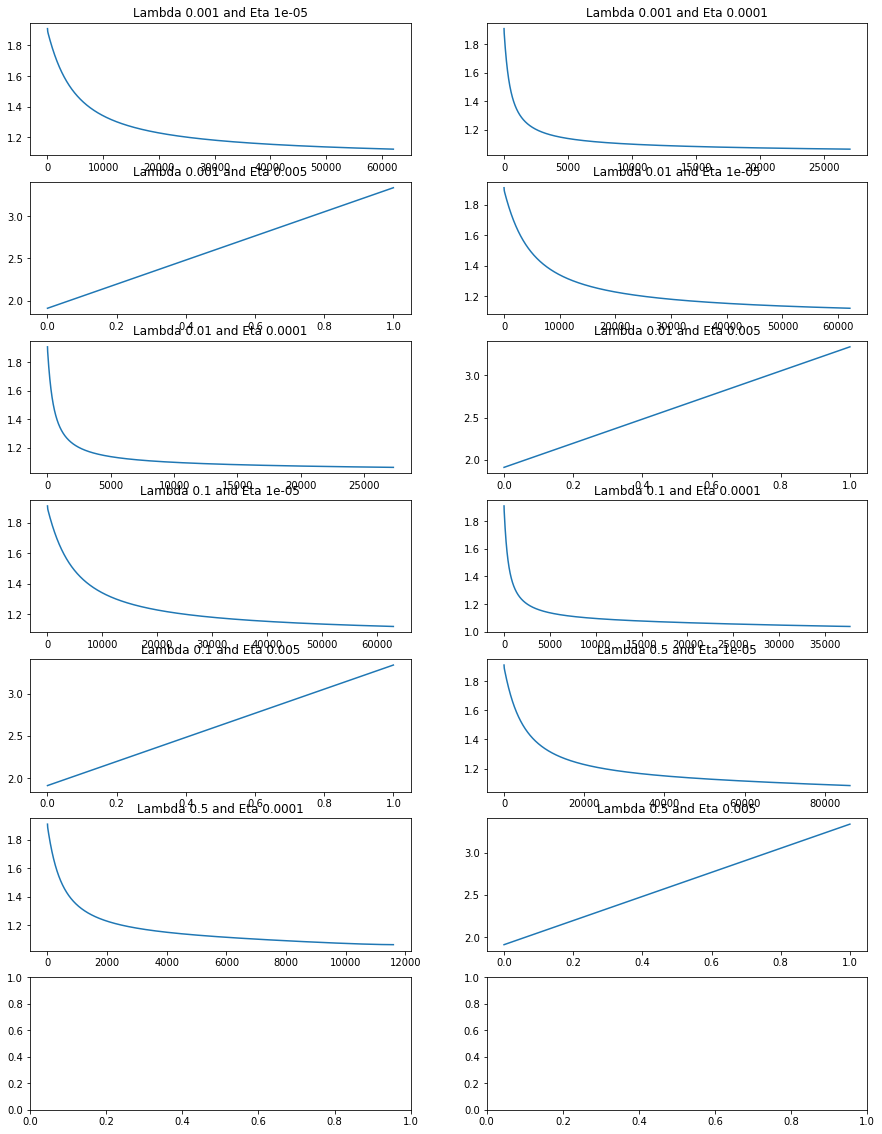

In [1136]:
lambdas_to_try = [0.001,0.01,0.1,0.5]
etas_to_try = [0.00001,0.0001,0.005]
fig, ax = plt.subplots(7,2, figsize = (15,20))
accuracy = {}
a,b = 0,0
prev_a = None
for lambd in lambdas_to_try:
    for eta in etas_to_try:
        
        test = LogisticRegression2(X=X,b=0,eta=eta,y=y,lambda_parameter=lambd)
        test.fit(max_iter=100000)
        
        lists = sorted(test.iter_cost_dict.items())
    
        print(lists[-1][1])
        accuracy[lambd,eta] = lists[-1][1]
        
        EX, WY = zip(*lists) # unpack a list of pairs into two tuples
        
        print("a,b",a,b)
        ax[a,b].plot(EX, WY)
        ax[a,b].set_title("Lambda {} and Eta {}".format(lambd,eta))
        
        if b == 0:
            b += 1
        elif a == prev_a:
            b=0
            a +=1
        prev_a = a
plt.show()

In [1137]:
min_val = 10
best_params = None
for key,val in accuracy.items():
    print(key,val)
    if min_val>val:
        min_val = val
        best_params = key

(0.001, 1e-05) 1.1226342145301973
(0.001, 0.0001) 1.0624111307936397
(0.001, 0.005) 3.339098574985049
(0.01, 1e-05) 1.1225146854004966
(0.01, 0.0001) 1.061696544856931
(0.01, 0.005) 3.339098574985049
(0.1, 1e-05) 1.1206292604819088
(0.1, 0.0001) 1.0375228465196877
(0.1, 0.005) 3.339098574985049
(0.5, 1e-05) 1.083230172052579
(0.5, 0.0001) 1.0621037127416988
(0.5, 0.005) 3.339098574985049


In [1145]:
# We can see that for lambd 0.1 and learning rate 0.0001
# we have the best convergence value of the neg log likelihood after 37k epochs
# this is better than some other methods, which take longer to converge and also have a worse value
print("The best values for params lambda: {} and eta: {}".format(best_params[0],best_params[1]))

The best values for params lambda: 0.1 and eta: 0.0001


In [9]:
# test
final_lr = LogisticRegression2(X=x,b=0,eta=0.0001,y=y,lambda_parameter=0.1)
final_lr.fit(max_iter=200000)

Entropy before iter 0 is 1.909542504884441


/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Entropy before iter 5000 is 1.1363106296441807
Entropy before iter 10000 is 1.0950984114540643
Entropy before iter 15000 is 1.0767811368966564
Entropy before iter 20000 is 1.0647504628685431
Entropy before iter 25000 is 1.0553524006952004
Entropy before iter 30000 is 1.0473964706433747
Entropy before iter 35000 is 1.0405792705375332


In [10]:
x_test = np.array([[4,11],[8.5,7]])
y_pred = final_lr.predict(x_test,get_class=True)
print("prediction for fruit with width 4cm and height 11 cm is {}".format(y_pred[0]))
print("prediction for fruit with width 8.5cm and height 7 cm is {}".format(y_pred[1]))

prediction for fruit with width 4cm and height 11 cm is 3.0
prediction for fruit with width 8.5cm and height 7 cm is 1.0


In [12]:
print("predictions:\n",final_lr.predict(x,get_class=True))

predictions:
 [1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [24]:
print("Negative LL:",sorted(final_lr.iter_cost_dict.values())[0])

Negative LL: 1.0375228465196877


In [14]:
from sklearn.metrics import confusion_matrix

y_pred = final_lr.predict(x,get_class=True)

#Evaluate Confusion Matrix of the Logit Regression
print("Confusion matrix")
print(confusion_matrix(data['fruit'].values,y_pred))

Confusion matrix
[[ 3 16  0]
 [ 3 20  1]
 [ 0  0 16]]


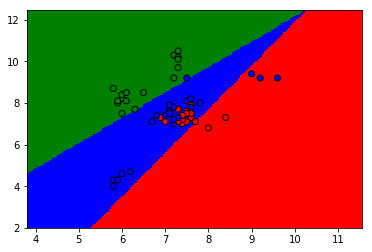

In [16]:
final_lr.visualize('logistic_regression.png')

Test fruit predictions for Gaussian Model:
width 4 cm and height 11 cm: 2
width 8.5 cm and height 7 cm: 2
Test fruit predictions for Shared Covariance Gaussian Model:
width 4 cm and height 11 cm: 2
width 8.5 cm and height 7 cm: 2
Test fruit predictions for Linear Regression:
width 4 cm and height 11 cm: 2
width 8.5 cm and height 7 cm: 2


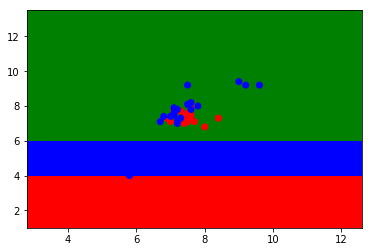

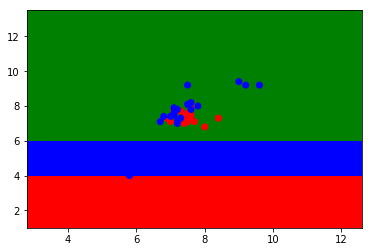

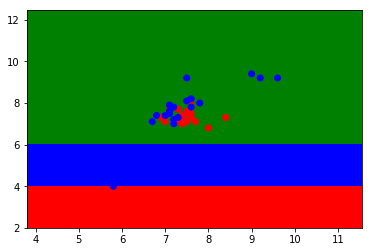

In [1156]:
# Don't change these imports. Note that the last two are the
# class implementations that you will implement in
# LogisticRegression.py and GaussianNaiveBayes.py

import matplotlib.pyplot as plt
import pandas as pd
from LogisticRegression import LogisticRegression
from GaussianGenerativeModel import GaussianGenerativeModel


## These are the hyperparameters to the classifiers. You may need to
# adjust these as you try to find the best fit for each classifier.

# Logistic Regression parameters
eta = .0001
lambda_parameter = .01


# Do not change anything below this line!!
# -----------------------------------------------------------------

# Read from file and extract X and Y
df = pd.read_csv("fruit.csv")
X = df[['width', 'height']].values
Y = (df['fruit'] - 1).values

nb1 = GaussianGenerativeModel(isSharedCovariance=False)
nb1.fit(X,Y)
nb1.visualize("generative_result_separate_covariances.png")

nb2 = GaussianGenerativeModel(isSharedCovariance=True)
nb2.fit(X,Y)
nb2.visualize("generative_result_shared_covariances.png")

lr = LogisticRegression(eta=eta, lambda_parameter=lambda_parameter)
lr.fit(X,Y)
lr.visualize('logistic_regression_result.png')

X_test = np.array([[4,11],[8.5,7]])
Y_nb1 = nb1.predict(X_test)
Y_nb2 = nb2.predict(X_test)
Y_lr = lr.predict(X_test)

print("Test fruit predictions for Gaussian Model:")
print("width 4 cm and height 11 cm: " + str(Y_nb1[0]))
print("width 8.5 cm and height 7 cm: " + str(Y_nb1[1]))

print("Test fruit predictions for Shared Covariance Gaussian Model:")
print("width 4 cm and height 11 cm: " + str(Y_nb2[0]))
print("width 8.5 cm and height 7 cm: " + str(Y_nb2[1]))

print("Test fruit predictions for Linear Regression:")
print("width 4 cm and height 11 cm: " + str(Y_lr[0]))
print("width 8.5 cm and height 7 cm: " + str(Y_lr[1]))